In [75]:
import urllib
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

sns.set()
%matplotlib inline

In [14]:
url = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv"

In [15]:
fname = "./RKI_covid19_daily_de.csv"

In [16]:
 urllib.request.urlretrieve(url, fname)

('./RKI_covid19_daily_de.csv', <http.client.HTTPMessage at 0x7fb4c23f5a90>)

In [17]:
df = pd.read_csv(fname, parse_dates=["Meldedatum"], date_parser=lambda ts: pd.Timestamp(ts).strftime('%Y-%m-%d'))

In [18]:
df.sort_values(['Meldedatum'], inplace=True)

In [19]:
df

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
296248,48415517,12,Brandenburg,LK Oberhavel,A15-A34,M,1,0,2020-01-21,12065,"27.10.2020, 00:00 Uhr",0,-9,2020/10/17 00:00:00,-9,0,1,Nicht übermittelt
209939,48329208,9,Bayern,SK München,A60-A79,M,1,0,2020-01-24,9162,"27.10.2020, 00:00 Uhr",0,-9,2020/01/24 00:00:00,0,1,0,Nicht übermittelt
220574,48339843,9,Bayern,LK Landsberg a.Lech,A15-A34,M,1,0,2020-01-28,9181,"27.10.2020, 00:00 Uhr",0,-9,2020/01/23 00:00:00,0,1,1,Nicht übermittelt
227907,48347176,9,Bayern,LK Starnberg,A35-A59,M,1,0,2020-01-28,9188,"27.10.2020, 00:00 Uhr",0,-9,2020/01/27 00:00:00,0,1,1,Nicht übermittelt
206505,48325774,9,Bayern,SK München,A15-A34,W,1,0,2020-01-29,9162,"27.10.2020, 00:00 Uhr",0,-9,2020/01/23 00:00:00,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244788,48364057,9,Bayern,SK Bayreuth,A60-A79,M,1,0,2020-10-26,9462,"27.10.2020, 00:00 Uhr",1,-9,2020/10/26 00:00:00,-9,0,0,Nicht übermittelt
144999,48264268,7,Rheinland-Pfalz,SK Ludwigshafen,A35-A59,M,7,0,2020-10-26,7314,"27.10.2020, 00:00 Uhr",1,-9,2020/10/26 00:00:00,-9,0,0,Nicht übermittelt
115580,48234849,6,Hessen,SK Frankfurt am Main,A15-A34,W,20,0,2020-10-26,6412,"27.10.2020, 00:00 Uhr",1,-9,2020/10/26 00:00:00,-9,0,0,Nicht übermittelt
162547,48281816,8,Baden-Württemberg,LK Ludwigsburg,A80+,W,1,0,2020-10-26,8118,"27.10.2020, 00:00 Uhr",1,-9,2020/10/16 00:00:00,-9,0,1,Nicht übermittelt


In [20]:
df["AnzahlFall"].sum()

449144

In [71]:
df.groupby("Meldedatum").sum()["AnzahlFall"].describe()

count      258.000000
mean      1740.868217
std       2216.057213
min          1.000000
25%        428.000000
50%        906.000000
75%       2139.000000
max      13532.000000
Name: AnzahlFall, dtype: float64

In [73]:
day_reported = df.groupby('Meldedatum')

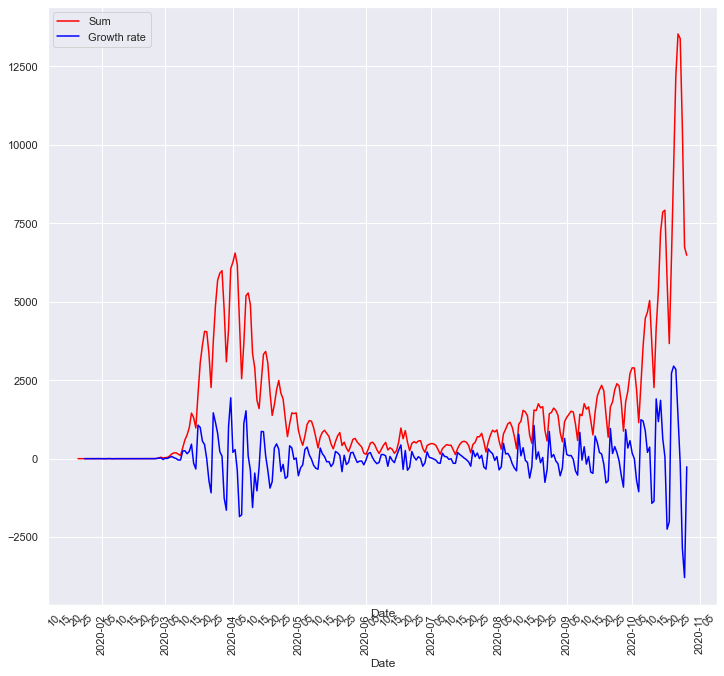

In [79]:
figsize = (12,11)
fig, ax = plt.subplots(2, 1, figsize=figsize, sharex=True, gridspec_kw={'height_ratios': [5, 0]})
fig.subplots_adjust(hspace=0.0)


for axis in ax.flat:
    axis.set_xlabel('Date')
    rule = mpl.dates.rrulewrapper(mpl.dates.MONTHLY,  bymonthday=(5, 10, 15, 20, 25))
    axis.xaxis.set_minor_locator(mpl.dates.RRuleLocator(rule))
    axis.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%d"))
    axis.xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=1))
    axis.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m'))

ax[1].yaxis.set_minor_locator(mpl.ticker.NullLocator())
ax[1].yaxis.set_major_locator(mpl.ticker.NullLocator())


cases_per_day = day_reported['AnzahlFall'].sum()
growth_rate = cases_per_day.diff()
ax[0].plot(cases_per_day, color='red', label='Sum')
ax[0].plot(growth_rate, color='blue', label='Growth rate')


for axis in ax.flat:
    plt.setp(axis.xaxis.get_majorticklabels(), rotation=90)
    plt.setp(axis.xaxis.get_minorticklabels(), rotation=45)

ax[0].legend()